<a href="https://colab.research.google.com/github/dscho15/DeepLearning/blob/main/Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [227]:
# All the used libs
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets

import sklearn.preprocessing
from tqdm.notebook import tqdm

# Binomial - Logistic Regression (2 Class Problem)

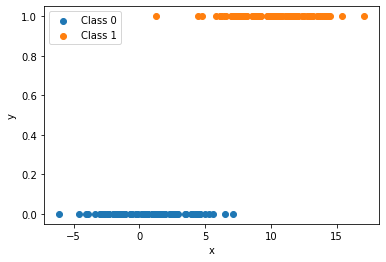

In [223]:
n = 100

c0 = np.random.normal(loc=1, scale=2.5, size=(1, n))
c1 = np.random.normal(loc=10, scale=2.5, size=(1, n))

plt.scatter(c0, np.zeros_like(c0), label='Class 0')
plt.scatter(c1, np.ones_like(c1), label='Class 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Implement the optimization loop:


*   Compute the avg. log-likelihood and report it
*   Compute the avg. gradient g (2x1)
*   Update w by adding g
*   (Repeat many times)

Plot your resulting fit over [-10, 20]

* Use np.arange(-10,20,0.1) for the x-values
* Then evaluate your fitted sigmoid to get y-values
* What’s the probability that x = 5 belongs to class 1?



In [219]:
x = np.vstack((np.ones((1, 200)), np.hstack((c0, c1))))
y = np.stack((np.zeros_like(c0), np.ones_like(c1))).reshape(-1, 1)
w = np.random.rand(2, 1)

print("The shape of x: %s y: %s z: %s"%(x.shape, y.shape, w.shape))

The shape of x: (2, 200) y: (200, 1) z: (2, 1)


There is no close-form solution to this problem, therefore, we need to perform gradient descent:

$$
w = w - \epsilon \nabla_W \log L(w)
$$

where

$$
\log L(w) = \sum_i y_i - \sigma(w^T x_i) x_i
$$

In [220]:
# The sigmoid function
def sigmoid(x, w):
  return 1/(1 + np.exp(-w.T @ x))

# Gradient of w
def grad(x, y, w):
  gradient = (y.T - sigmoid(x, w)) @ x.T
  return gradient.T

Start the algorithm, take a random set of pointsl then compute the gradient. Notice, that we want to minimize the log-likelihood, therefore, we have to change to positive sign on gradient descent

In [221]:
lr = 0.002
batch = 50

gradient = grad(x, y, w)

grad_list = []

while np.linalg.norm(gradient*lr) > 0.0001:
  pick = np.random.choice(y.shape[0], batch)
  gradient = grad(x[:, pick], y[pick], w)
  w = w + lr*gradient
  grad_list.append(np.linalg.norm(gradient))

Plot the results

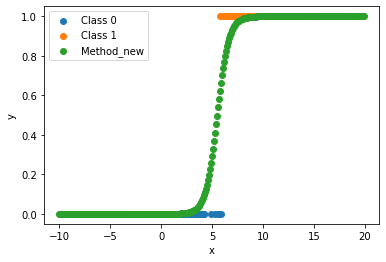

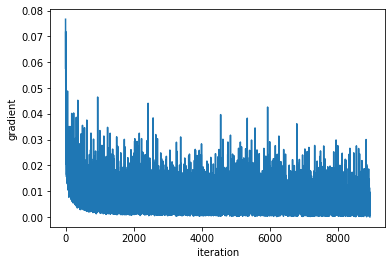

In [222]:
x_test = np.arange(-10, 20, 0.1)
x_test = np.vstack((np.ones_like(x_test), x_test))
y_test = []
for i in range(x_test.shape[1]):
  y_test.append(sigmoid(x_test[:,i], w))

# Scatter plot of the results
plt.figure(1)
plt.scatter(c0, np.zeros_like(c0), label='Class 0')
plt.scatter(c1, np.ones_like(c1), label='Class 1')
plt.scatter(x_test[1,:], y_test, label="Result")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Scatter plot of the gradients versus iterations
plt.figure(2)
plt.plot(np.array(grad_list)*lr)
plt.xlabel('iteration')
plt.ylabel('gradient')
plt.show()

# Multinomial (softmax)

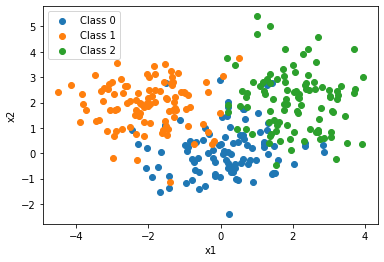

In [224]:
c0 = np.random.multivariate_normal([0, 0], np.eye(2), n).T  # (2, 100)
c1 = np.random.multivariate_normal([-2, 2], np.eye(2), n).T
c2 = np.random.multivariate_normal([2, 2], np.eye(2), n).T

plt.scatter(*c0, label='Class 0')
plt.scatter(*c1, label='Class 1')
plt.scatter(*c2, label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

#### Fit model

Just like before
* Compute current softmax output using W and X (a $3 \times m$ data matrix )
* Compute the avg. log-likelihood
* Compute the avg. gradient (a 3x3 matrix)
* Update W

What classification rate do you get?

In [ ]:
# Put Code here

Now let's try it out on MNIST data

In [228]:
mnist_train_dataset = datasets.MNIST('', train=True, download=True)
mnist_test_dataset = datasets.MNIST('', train=False, download=True)

x_train = np.array(mnist_train_dataset.data)
y_train = np.array(mnist_train_dataset.targets)

x_test = np.array(mnist_test_dataset.data)
y_test = np.array(mnist_test_dataset.targets)

Now repeat the same steps as above.

What classification rate do you get? Is it better than last week?

In [229]:
# One-hot encode labels
y_train = sklearn.preprocessing.label_binarize(y_train, range(10))
y_test = sklearn.preprocessing.label_binarize(y_test, range(10))

# Normalize images
x_train, x_test = x_train / 255 - 0.5, x_test / 255 - 0.5

# Vectorize
d_data = np.prod(x_train.shape[1:])
x_train = x_train.reshape((-1, d_data))
x_test = x_test.reshape((-1, d_data))

# Store images/labels in columns
x_train, y_train, x_test, y_test = x_train.T, y_train.T, x_test.T, y_test.T

# Add bias term
x_train = np.concatenate((np.ones((1, 60000)), x_train), axis=0)
x_test = np.concatenate((np.ones((1, 10000)), x_test), axis=0)
d_data += 1

# Initialize parameters
w = np.random.randn(d_data, 10) * 1e-2